In [1]:
#import lightgbm as lgb
import pickle
import dill as pickle

In [2]:
#%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')

# for seaborn issue:
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action="ignore")
#ML Packages
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, classification_report, confusion_matrix
import scipy.stats as stats
from operator import itemgetter

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df=pd.read_csv('/Users/sri.t/Desktop/AMEX1/Churn_Data/Downstream_prepared_Final_2.csv',sep=',')

In [5]:
df.shape

(6204448, 86)

In [6]:
df.head()

,LAV_ID1,Month,Year,churn,renewal_3months,BT_Yes,revolve_Yes,FF_Yes,FH_Yes,LC_Yes,MR_Count,MR_Unique_Level3,detailed_fee_type,product_description,AgeCat,acct_myca_active,optout,SuppStatus_1,cancel_dt,estab_dt,estab_dt_1,months_active,Avg_lcl_spend,Avg_lcl_supp_spend,Avg_roc_count,Avg_roc_supp_count,acct_purchase_size,Supp_purchase_size,Avg_Supp_Count,Avg_myca_count,Avg_E_O/S,Avg_E_C/O,acct_spend_lcl,acct_spend_lcl-1,acct_spend_lcl-2,acct_spend_lcl-3,acct_spend_lcl-4,acct_spend_lcl-5,acct_supp_spend_lcl,acct_supp_spend_lcl-1,acct_supp_spend_lcl-2,acct_supp_spend_lcl-3,acct_supp_spend_lcl-4,acct_supp_spend_lcl-5,roc_cnt,roc_cnt-1,roc_cnt-2,roc_cnt-3,roc_cnt-4,roc_cnt-5,roc_supp_cnt,roc_supp_cnt-1,roc_supp_cnt-2,roc_supp_cnt-3,roc_supp_cnt-4,roc_supp_cnt-5,atvesupp,atvesupp-1,atvesupp-2,atvesupp-3,atvesupp-4,atvesupp-5,myca_active_app,myca_active_app-1,myca_active_app-2,myca_active_app-3,myca_active_app-4,myca_active_app-5,total_sent,total_sent-1,total_sent-2,total_sent-3,total_sent-4,total_sent-5,total_opens,total_opens-1,total_opens-2,total_opens-3,total_opens-4,total_opens-5,total_clicks,total_clicks-1,total_clicks-2,total_clicks-3,total_clicks-4,total_clicks-5
0,LAV000000000020869,8,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Full Fee,GREEN,65+,0.0,0.0,0,2100-01-01,1990-02-01,1990-02-01,333,543.500000,0.0,12.000000,0.0,45.291667,NaN,0.0,0.000000,0.000000,NaN,577,470.0,631.0,594.0,568.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,12.0,16.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LAV000000000160208,3,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Full Fee,GOLD,65+,1.0,0.0,1,2100-01-01,2000-11-01,2000-11-01,204,798.333333,0.0,0.500000,0.0,1596.666667,NaN,1.0,1.333333,1.000000,0.0,0,0.0,0.0,0.0,4790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LAV000000000161089,2,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Full Fee,GOLD,55 - 65,0.0,0.0,0,2100-01-01,1977-05-01,1977-05-01,486,22.000000,0.0,2.000000,0.0,11.000000,NaN,0.0,0.000000,0.826087,0.0,24,22.0,20.0,22.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,5.0,8.0,2.0,1.0,1.0,2.0,5.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LAV000000000147160,6,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Full Fee,GOLD,55 - 65,0.0,0.0,0,2017-04-01,2000-09-01,2000-09-01,199,874.166667,0.0,4.333333,0.0,201.730769,NaN,0.0,0.000000,NaN,NaN,513,717.0,275.0,2547.0,631.0,562.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,10.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LAV000000000007837,5,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,Full Fee,GREEN,18 - 25,0.0,1.0,0,2100-01-01,1979-01-01,1979-01-01,466,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,0.000000,0.000000,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [7]:
df.groupby('churn').agg({'acct_spend_lcl-5':'mean','acct_spend_lcl-4':'mean','acct_spend_lcl-3':'mean','acct_spend_lcl-2':'mean','acct_spend_lcl-1':'mean','acct_spend_lcl':'mean'})

,acct_spend_lcl-5,acct_spend_lcl-4,acct_spend_lcl-3,acct_spend_lcl-2,acct_spend_lcl-1,acct_spend_lcl
churn,,,,,,
0,1575.725577,1587.795624,1585.556857,1575.490477,1576.463469,1583.624746
1,847.992207,829.834463,784.067169,714.794192,597.863695,417.162411


In [8]:
df.groupby('churn').agg({'acct_supp_spend_lcl-5':'mean','acct_supp_spend_lcl-4':'mean','acct_supp_spend_lcl-3':'mean','acct_supp_spend_lcl-2':'mean','acct_supp_spend_lcl-1':'mean','acct_supp_spend_lcl':'mean'})

,acct_supp_spend_lcl-5,acct_supp_spend_lcl-4,acct_supp_spend_lcl-3,acct_supp_spend_lcl-2,acct_supp_spend_lcl-1,acct_supp_spend_lcl
churn,,,,,,
0,353.252535,355.497983,355.904793,354.478906,353.261282,356.007986
1,157.342972,153.012073,145.961822,132.734358,111.133841,75.944772


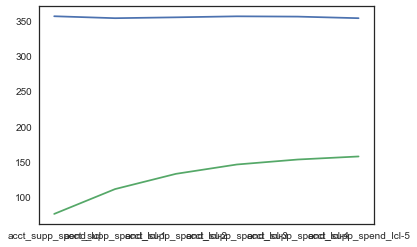

In [9]:
plt.plot(df.groupby('churn').agg({'acct_supp_spend_lcl-5':'mean','acct_supp_spend_lcl-4':'mean','acct_supp_spend_lcl-3':'mean','acct_supp_spend_lcl-2':'mean','acct_supp_spend_lcl-1':'mean','acct_supp_spend_lcl':'mean'}).T)

In [10]:
df.groupby('churn').agg({'roc_cnt-5':'mean','roc_cnt-4':'mean','roc_cnt-3':'mean','roc_cnt-2':'mean','roc_cnt-1':'mean','roc_cnt':'mean'}).T

churn,0,1
roc_cnt-5,9.992736,5.577825
roc_cnt-4,10.098172,5.335768
roc_cnt-3,10.063412,5.019456
roc_cnt-2,10.003187,4.574783
roc_cnt-1,9.993526,3.973417
roc_cnt,10.046549,2.891516


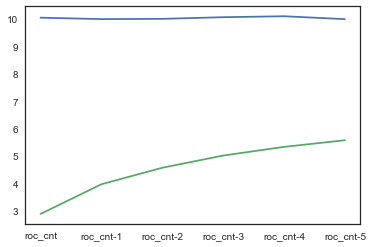

In [11]:
plt.plot(df.groupby('churn').agg({'roc_cnt':'mean','roc_cnt-1':'mean','roc_cnt-2':'mean','roc_cnt-3':'mean','roc_cnt-4':'mean','roc_cnt-5':'mean'}).T)

In [12]:
df.groupby('churn').agg({'roc_supp_cnt-5':'mean','roc_supp_cnt-4':'mean','roc_supp_cnt-3':'mean','roc_supp_cnt-2':'mean','roc_supp_cnt-1':'mean','roc_supp_cnt':'mean'}).T

churn,0,1
roc_supp_cnt-5,2.280954,0.969139
roc_supp_cnt-4,2.299311,0.931662
roc_supp_cnt-3,2.299527,0.879297
roc_supp_cnt-2,2.287299,0.802933
roc_supp_cnt-1,2.288635,0.694173
roc_supp_cnt,2.301264,0.499664


In [13]:
df.groupby('churn').agg({'myca_active_app-5':'mean','myca_active_app-4':'mean','myca_active_app-3':'mean','myca_active_app-2':'mean','myca_active_app-1':'mean','myca_active_app':'mean'})

,myca_active_app-5,myca_active_app-4,myca_active_app-3,myca_active_app-2,myca_active_app-1,myca_active_app
churn,,,,,,
0,0.839134,0.865839,0.872928,0.880862,0.897567,0.925004
1,0.827073,0.823038,0.815393,0.805725,0.797541,0.751754


In [14]:
df.groupby('churn').agg({'total_opens-5':'mean','total_opens-4':'mean','total_opens-3':'mean','total_opens-2':'mean','total_opens-1':'mean','total_opens':'mean'})

,total_opens-5,total_opens-4,total_opens-3,total_opens-2,total_opens-1,total_opens
churn,,,,,,
0,0.596130,0.608856,0.628557,0.671308,0.699711,0.711762
1,0.401995,0.408281,0.414116,0.426942,0.439172,0.372868


In [15]:
df.groupby('churn').agg({'total_clicks-5':'mean','total_clicks-4':'mean','total_clicks-3':'mean','total_clicks-2':'mean','total_clicks-1':'mean','total_clicks':'mean'})

,total_clicks-5,total_clicks-4,total_clicks-3,total_clicks-2,total_clicks-1,total_clicks
churn,,,,,,
0,0.058602,0.058446,0.061238,0.064099,0.065670,0.068639
1,0.037660,0.036519,0.036506,0.036199,0.036021,0.029750


In [16]:
df.groupby('churn').agg({'total_sent-5':'mean','total_sent-4':'mean','total_sent-3':'mean','total_sent-2':'mean','total_sent-1':'mean','total_sent':'mean'})

,total_sent-5,total_sent-4,total_sent-3,total_sent-2,total_sent-1,total_sent
churn,,,,,,
0,0.988875,1.023427,1.065124,1.142550,1.192605,1.216984
1,0.703741,0.731564,0.755294,0.791136,0.816729,0.693488


In [17]:
df.groupby('churn').agg({'total_opens-5':'sum','total_opens-4':'sum','total_opens-3':'sum','total_opens-2':'sum','total_opens-1':'sum','total_opens':'sum'})

,total_opens-5,total_opens-4,total_opens-3,total_opens-2,total_opens-1,total_opens
churn,,,,,,
0,3364521.0,3436346.0,3547535.0,3788820.0,3949125.0,4017140.0
1,225322.0,228845.0,232116.0,239305.0,246160.0,208996.0


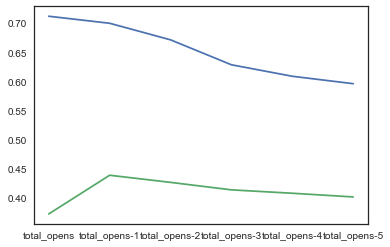

In [14]:
plt.plot(df.groupby('churn').agg({'total_opens-5':'mean','total_opens-4':'mean','total_opens-3':'mean','total_opens-2':'mean','total_opens-1':'mean','total_opens':'mean'}).T)

In [18]:
df.groupby('churn').agg({'total_sent-5':'sum','total_sent-4':'sum','total_sent-3':'sum','total_sent-2':'sum','total_sent-1':'sum','total_sent':'sum'})

,total_sent-5,total_sent-4,total_sent-3,total_sent-2,total_sent-1,total_sent
churn,,,,,,
0,5581150.0,5776162.0,6011493.0,6448480.0,6730992.0,6868581.0
1,394453.0,410048.0,423349.0,443439.0,457784.0,388706.0


In [19]:
print ('Non-chuners')
print (4017140.0/6868581.0)
print (3949125.0/6730992.0)
print (3788820.0/6448480.0)
print (3547535.0/6011493.0)
print (3436346.0/5776162.0)
print (3364521.0/5581150.0)

Non-chuners
0.584857338073177
0.5867077245077694
0.5875524154529439
0.5901254480376172
0.5949185635721436
0.6028365121883483


In [20]:
print ('Churner')
print (208996.0/388706.0)
print (246160.0/457784.0)
print (239305.0/443439.0)
print (232116.0/423349.0)
print (228845.0/410048.0)
print (225322.0/394453.0)

Churner
0.537671144772656
0.5377208465127659
0.5396570892501562
0.5482852209406424
0.5580931988450133
0.5712264832565603


In [21]:
df.groupby('churn').agg({'Avg_E_O/S':'mean','Avg_E_C/O':'mean'})

,Avg_E_O/S,Avg_E_C/O
churn,,
0,0.612163,0.104647
1,0.564634,0.086417


In [22]:
df.groupby('churn').agg({'MR_Unique_Level3':'mean','MR_Count':'mean','months_active':'mean','Avg_lcl_spend':'mean','Avg_lcl_supp_spend':'mean','Avg_roc_count':'mean','Avg_roc_supp_count':'mean'})

,MR_Unique_Level3,MR_Count,months_active,Avg_lcl_spend,Avg_lcl_supp_spend,Avg_roc_count,Avg_roc_supp_count
churn,,,,,,,
0,0.145572,0.435870,116.688905,1580.776125,354.733914,10.032930,2.292832
1,0.208216,0.451347,86.683679,698.619023,129.354973,4.562127,0.796145


In [23]:
pd.crosstab(df['churn'],df['renewal_3months']).apply(lambda r: r/r.sum(), axis=1)

renewal_3months,0,1
churn,,
0,0.75269,0.24731
1,0.65265,0.34735


In [24]:
pd.crosstab(df['churn'],df['BT_Yes']).apply(lambda r: r/r.sum(), axis=1)

BT_Yes,0.0,1.0
churn,,
0,0.983332,0.016668
1,0.968279,0.031721


In [25]:
pd.crosstab(df['churn'],df['revolve_Yes']).apply(lambda r: r/r.sum(), axis=1)

revolve_Yes,0.0,1.0
churn,,
0,0.645975,0.354025
1,0.584877,0.415123


In [39]:
pd.crosstab(df['churn'],df['optout']).apply(lambda r: r/r.sum(), axis=1)

optout,0.0,1.0
churn,,
0,0.556430,0.443570
1,0.538007,0.461993


In [40]:
pd.crosstab(df['churn'],df['acct_myca_active']).apply(lambda r: r/r.sum(), axis=1)

acct_myca_active,0.0,1.0
churn,,
0,0.627822,0.372178
1,0.798064,0.201936


In [41]:
pd.crosstab(df['churn'],df['SuppStatus_1']).apply(lambda r: r/r.sum(), axis=1)

SuppStatus_1,0,1
churn,,
0,0.580167,0.419833
1,1.000000,0.000000


In [32]:
pd.crosstab(df['churn'],df['product_description']).apply(lambda r: r/r.sum()).shape

(2, 34)

In [18]:
pd.crosstab(df['churn'],df['detailed_fee_type']).apply(lambda r: r/r.sum())

detailed_fee_type,First Year Free,First Year Reduced Fee,Free For Life / No Fee,Full Fee
churn,,,,
0,0.896122,0.902675,0.936223,0.895002
1,0.103878,0.097325,0.063777,0.104998


In [27]:
stats.f_oneway(df[df['churn']==0]['Avg_lcl_spend'], df[df['churn']==1]['Avg_lcl_spend'])

F_onewayResult(statistic=8394.05535596245, pvalue=0.0)

In [35]:
stats.f_oneway(df[df['churn']==0]['Avg_lcl_supp_spend'], df[df['churn']==1]['Avg_lcl_supp_spend'])

F_onewayResult(statistic=1885.4684825132044, pvalue=0.0)

In [29]:
crs=pd.crosstab(df['churn'],df['renewal_3months'],margins=True)
observed=crs.iloc[0:2,0:2]
print (observed)
print (stats.chi2_contingency(observed= observed))

renewal_3months        0        1
churn                            
0                4248138  1395801
1                 365816   194693


In [34]:
crs=pd.crosstab(df['churn'],df['product_description'],margins=True)
observed=crs.iloc[0:2,0:34]
#print (observed)
print (stats.chi2_contingency(observed= observed))

(64298.94333827514, 0.0, 33, array([[3.03016887e+04, 6.70055655e+03, 1.43530724e+05, 3.09466378e+03,
        6.03972485e+05, 1.72899102e+04, 1.07274400e+05, 9.74564385e+04,
        1.96197317e+05, 2.73953246e+04, 1.09597308e+06, 1.62817338e+05,
        8.96506449e+04, 2.28815910e+04, 3.66668536e+05, 3.62681495e+04,
        1.41670469e+04, 1.87351782e+05, 1.18919869e+04, 2.93533680e+05,
        9.05748596e+03, 4.05304531e+05, 3.22201620e+03, 3.14974370e+05,
        3.65792533e+04, 7.11499771e+04, 4.05608357e+04, 4.84776988e+05,
        1.81262517e+05, 1.34408652e+05, 5.81945974e+04, 1.74896715e+05,
        1.61491964e+04, 1.98984516e+05],
       [3.00931127e+03, 6.65443452e+02, 1.42542757e+04, 3.07336224e+02,
        5.99815153e+04, 1.71708983e+03, 1.06535997e+04, 9.67856153e+03,
        1.94846829e+04, 2.72067540e+03, 1.08842916e+05, 1.61696616e+04,
        8.90335514e+03, 2.27240899e+03, 3.64144641e+04, 3.60185045e+03,
        1.40695307e+03, 1.86062181e+04, 1.18101307e+03, 2.91513196

In [38]:
#df.dtypes

In [37]:
df.columns

Index(['LAV_ID1', 'Month', 'Year', 'churn', 'renewal_3months', 'BT_Yes',
       'revolve_Yes', 'FF_Yes', 'FH_Yes', 'LC_Yes', 'MR_Count',
       'MR_Unique_Level3', 'detailed_fee_type', 'product_description',
       'AgeCat', 'acct_myca_active', 'optout', 'SuppStatus_1', 'cancel_dt',
       'estab_dt', 'estab_dt_1', 'months_active', 'Avg_lcl_spend',
       'Avg_lcl_supp_spend', 'Avg_roc_count', 'Avg_roc_supp_count',
       'acct_purchase_size', 'Supp_purchase_size', 'Avg_Supp_Count',
       'Avg_myca_count', 'Avg_E_O/S', 'Avg_E_C/O', 'acct_spend_lcl',
       'acct_spend_lcl-1', 'acct_spend_lcl-2', 'acct_spend_lcl-3',
       'acct_spend_lcl-4', 'acct_spend_lcl-5', 'acct_supp_spend_lcl',
       'acct_supp_spend_lcl-1', 'acct_supp_spend_lcl-2',
       'acct_supp_spend_lcl-3', 'acct_supp_spend_lcl-4',
       'acct_supp_spend_lcl-5', 'roc_cnt', 'roc_cnt-1', 'roc_cnt-2',
       'roc_cnt-3', 'roc_cnt-4', 'roc_cnt-5', 'roc_supp_cnt', 'roc_supp_cnt-1',
       'roc_supp_cnt-2', 'roc_supp_cnt-3', 

In [7]:
cols=['renewal_3months','BT_Yes','revolve_Yes','MR_Count',
      'MR_Unique_Level3', 'detailed_fee_type', 'product_description',
      'AgeCat','months_active','acct_myca_active', 'optout','SuppStatus_1',
      'acct_spend_lcl', 'acct_spend_lcl-1', 'acct_spend_lcl-2', 'acct_spend_lcl-3',
       'acct_spend_lcl-4', 'acct_spend_lcl-5', 'acct_supp_spend_lcl',
       'acct_supp_spend_lcl-1', 'acct_supp_spend_lcl-2',
       'acct_supp_spend_lcl-3', 'acct_supp_spend_lcl-4',
       'acct_supp_spend_lcl-5', 'roc_cnt', 'roc_cnt-1', 'roc_cnt-2',
       'roc_cnt-3', 'roc_cnt-4', 'roc_cnt-5', 'roc_supp_cnt', 'roc_supp_cnt-1',
       'roc_supp_cnt-2', 'roc_supp_cnt-3', 'roc_supp_cnt-4', 'roc_supp_cnt-5',
       'myca_active_app', 'myca_active_app-1','myca_active_app-2', 'myca_active_app-3', 'myca_active_app-4',
       'myca_active_app-5','Avg_E_O/S', 'Avg_E_C/O']

In [20]:
c=['Avg_lcl_spend',
       'Avg_lcl_supp_spend', 'Avg_roc_count', 'Avg_roc_supp_count','Avg_Supp_Count',
       'Avg_myca_count', 'Avg_E_O/S', 'Avg_E_C/O']

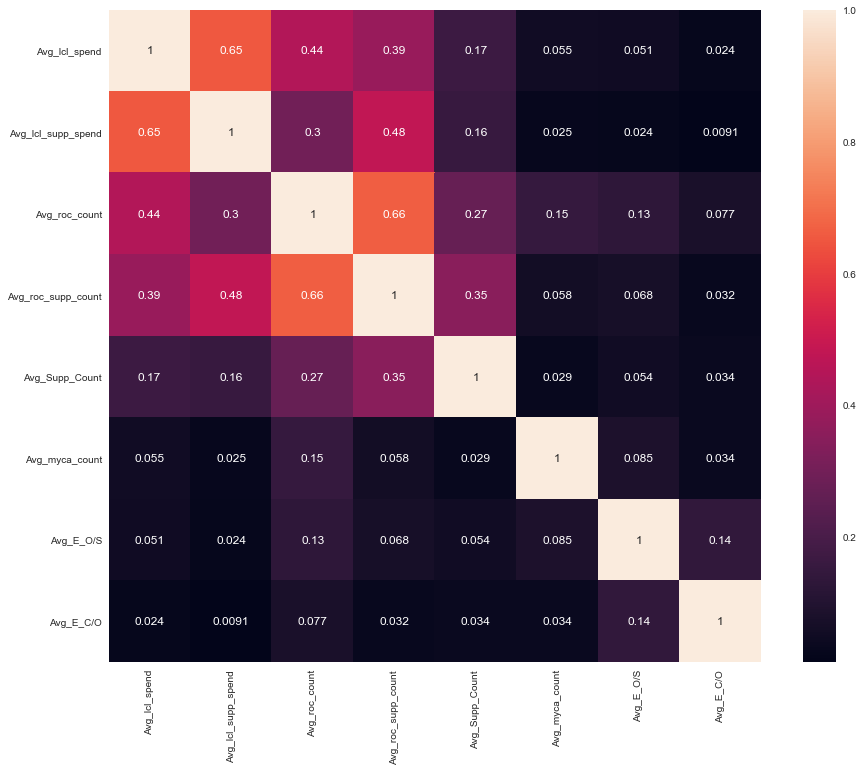

In [21]:
plt.figure(figsize=(15,12))
corr = df[c].corr()
sns.heatmap(corr, vmax=1.0, square=True, annot=True)

In [22]:
c=['acct_spend_lcl', 'acct_spend_lcl-1', 'acct_spend_lcl-2', 'acct_spend_lcl-3',
       'acct_spend_lcl-4', 'acct_spend_lcl-5', 'acct_supp_spend_lcl',
       'acct_supp_spend_lcl-1', 'acct_supp_spend_lcl-2',
       'acct_supp_spend_lcl-3', 'acct_supp_spend_lcl-4',
       'acct_supp_spend_lcl-5', 'roc_cnt', 'roc_cnt-1', 'roc_cnt-2',
       'roc_cnt-3', 'roc_cnt-4', 'roc_cnt-5', 'roc_supp_cnt', 'roc_supp_cnt-1',
       'roc_supp_cnt-2', 'roc_supp_cnt-3', 'roc_supp_cnt-4', 'roc_supp_cnt-5']

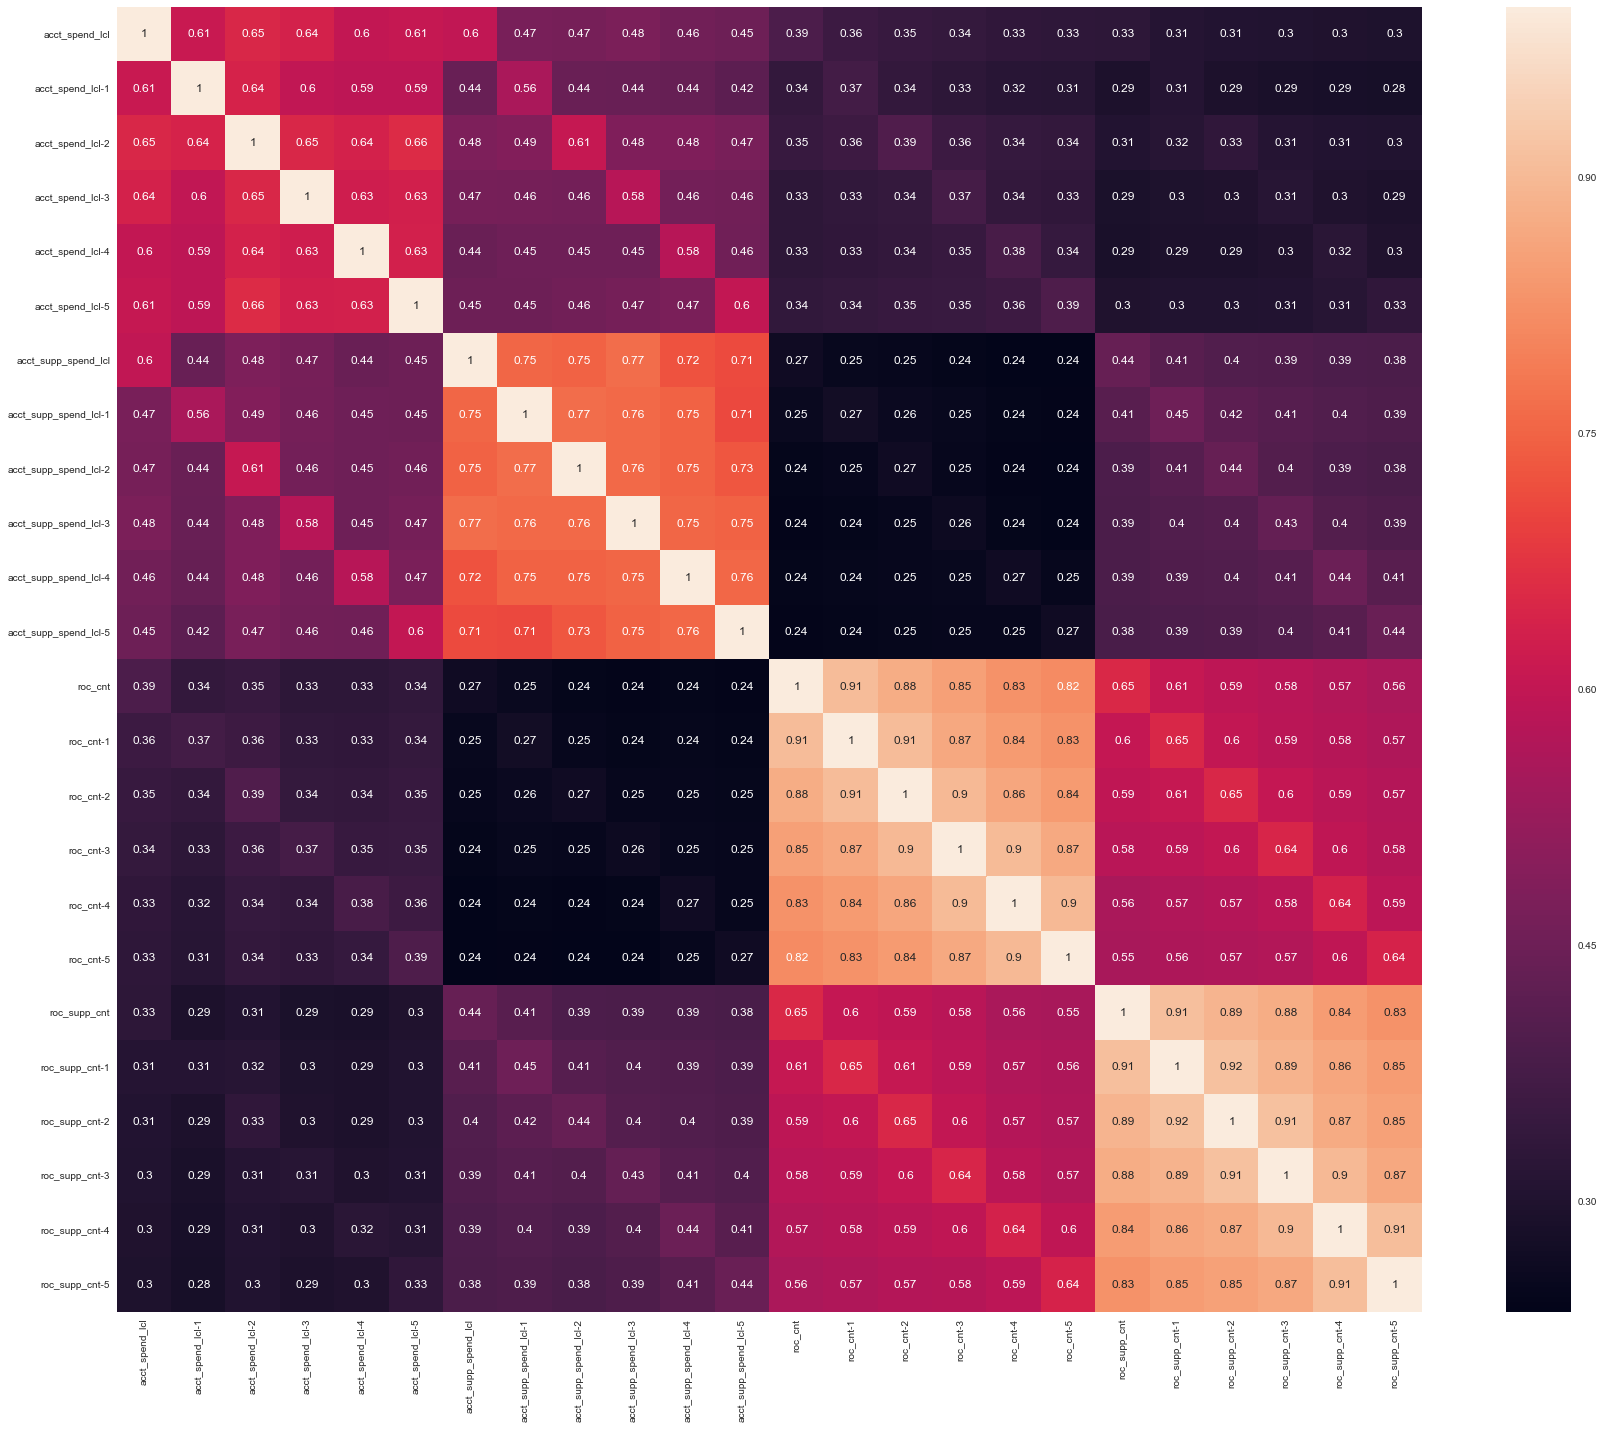

In [23]:
plt.figure(figsize=(30,24))
corr = df[c].corr()
sns.heatmap(corr, vmax=1.0, square=True, annot=True)

In [24]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=8)
pca.fit(df[c].values)
pickle.dump(pca, open('pca_dumped', 'wb'))

In [39]:
pca_load=pickle.load(open('pca_dumped', 'rb'))

In [34]:
x=pca_load.transform(df[c].values)

In [35]:
x.shape

(6204448, 4)

In [40]:
pca_load.explained_variance_ratio_

array([0.62702743, 0.08042785, 0.06150528, 0.05515209, 0.0497303 ,
       0.04875687])

In [7]:
for f in df[cols].columns:
    if (df[f].dtype == 'object'):
        lbl=LabelEncoder()
        lbl.fit(list(df[f].values))
        pickle.dump(lbl, open('labelEncodeforChurn'+f, 'wb'))
        df[f]=lbl.transform(list(df[f].values))

In [9]:
df.head()

,LAV_ID1,Month,Year,churn,renewal_3months,BT_Yes,revolve_Yes,FF_Yes,FH_Yes,LC_Yes,MR_Count,MR_Unique_Level3,detailed_fee_type,product_description,AgeCat,acct_myca_active,optout,SuppStatus_1,cancel_dt,estab_dt,estab_dt_1,months_active,Avg_lcl_spend,Avg_lcl_supp_spend,Avg_roc_count,Avg_roc_supp_count,acct_purchase_size,Supp_purchase_size,Avg_Supp_Count,Avg_myca_count,Avg_E_O/S,Avg_E_C/O,acct_spend_lcl,acct_spend_lcl-1,acct_spend_lcl-2,acct_spend_lcl-3,acct_spend_lcl-4,acct_spend_lcl-5,acct_supp_spend_lcl,acct_supp_spend_lcl-1,acct_supp_spend_lcl-2,acct_supp_spend_lcl-3,acct_supp_spend_lcl-4,acct_supp_spend_lcl-5,roc_cnt,roc_cnt-1,roc_cnt-2,roc_cnt-3,roc_cnt-4,roc_cnt-5,roc_supp_cnt,roc_supp_cnt-1,roc_supp_cnt-2,roc_supp_cnt-3,roc_supp_cnt-4,roc_supp_cnt-5,atvesupp,atvesupp-1,atvesupp-2,atvesupp-3,atvesupp-4,atvesupp-5,myca_active_app,myca_active_app-1,myca_active_app-2,myca_active_app-3,myca_active_app-4,myca_active_app-5,total_sent,total_sent-1,total_sent-2,total_sent-3,total_sent-4,total_sent-5,total_opens,total_opens-1,total_opens-2,total_opens-3,total_opens-4,total_opens-5,total_clicks,total_clicks-1,total_clicks-2,total_clicks-3,total_clicks-4,total_clicks-5
0,LAV000000000020869,8,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,17,5,0.0,0.0,0,2100-01-01,1990-02-01,1990-02-01,333,543.500000,0.0,12.000000,0.0,45.291667,NaN,0.0,0.000000,0.000000,NaN,577,470.0,631.0,594.0,568.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,12.0,16.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LAV000000000160208,3,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,5,1.0,0.0,1,2100-01-01,2000-11-01,2000-11-01,204,798.333333,0.0,0.500000,0.0,1596.666667,NaN,1.0,1.333333,1.000000,0.0,0,0.0,0.0,0.0,4790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LAV000000000161089,2,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,4,0.0,0.0,0,2100-01-01,1977-05-01,1977-05-01,486,22.000000,0.0,2.000000,0.0,11.000000,NaN,0.0,0.000000,0.826087,0.0,24,22.0,20.0,22.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,5.0,8.0,2.0,1.0,1.0,2.0,5.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LAV000000000147160,6,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,4,0.0,0.0,0,2017-04-01,2000-09-01,2000-09-01,199,874.166667,0.0,4.333333,0.0,201.730769,NaN,0.0,0.000000,NaN,NaN,513,717.0,275.0,2547.0,631.0,562.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,10.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LAV000000000007837,5,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,17,0,0.0,1.0,0,2100-01-01,1979-01-01,1979-01-01,466,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,0.000000,0.000000,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
for f in df[cols].columns:
    if (df[f].dtype == 'object'):
        #lbl=LabelEncoder()
        #lbl.fit(list(df[f].values))
        mod=pickle.load(open('labelEncodeforChurn'+f, 'rb'))
        #pickle.dump(lbl, open('labelEncodeforChurn'+f, 'wb'))
        df[f]=mod.transform(list(df[f].values))

In [11]:
#df[cols].isnull().sum()

In [10]:
df['Avg_E_O/S']=df['Avg_E_O/S'].fillna(value=0)
df['Avg_E_C/O']=df['Avg_E_C/O'].fillna(value=0)

In [8]:
df.head()

,LAV_ID1,Month,Year,churn,renewal_3months,BT_Yes,revolve_Yes,FF_Yes,FH_Yes,LC_Yes,MR_Count,MR_Unique_Level3,detailed_fee_type,product_description,AgeCat,acct_myca_active,optout,SuppStatus_1,cancel_dt,estab_dt,estab_dt_1,months_active,Avg_lcl_spend,Avg_lcl_supp_spend,Avg_roc_count,Avg_roc_supp_count,acct_purchase_size,Supp_purchase_size,Avg_Supp_Count,Avg_myca_count,Avg_E_O/S,Avg_E_C/O,acct_spend_lcl,acct_spend_lcl-1,acct_spend_lcl-2,acct_spend_lcl-3,acct_spend_lcl-4,acct_spend_lcl-5,acct_supp_spend_lcl,acct_supp_spend_lcl-1,acct_supp_spend_lcl-2,acct_supp_spend_lcl-3,acct_supp_spend_lcl-4,acct_supp_spend_lcl-5,roc_cnt,roc_cnt-1,roc_cnt-2,roc_cnt-3,roc_cnt-4,roc_cnt-5,roc_supp_cnt,roc_supp_cnt-1,roc_supp_cnt-2,roc_supp_cnt-3,roc_supp_cnt-4,roc_supp_cnt-5,atvesupp,atvesupp-1,atvesupp-2,atvesupp-3,atvesupp-4,atvesupp-5,myca_active_app,myca_active_app-1,myca_active_app-2,myca_active_app-3,myca_active_app-4,myca_active_app-5,total_sent,total_sent-1,total_sent-2,total_sent-3,total_sent-4,total_sent-5,total_opens,total_opens-1,total_opens-2,total_opens-3,total_opens-4,total_opens-5,total_clicks,total_clicks-1,total_clicks-2,total_clicks-3,total_clicks-4,total_clicks-5
0,LAV000000000020869,8,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,17,5,0.0,0.0,0,2100-01-01,1990-02-01,1990-02-01,333,543.500000,0.0,12.000000,0.0,45.291667,NaN,0.0,0.000000,0.000000,0.0,577,470.0,631.0,594.0,568.0,421.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,10.0,12.0,16.0,12.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,LAV000000000160208,3,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,5,1.0,0.0,1,2100-01-01,2000-11-01,2000-11-01,204,798.333333,0.0,0.500000,0.0,1596.666667,NaN,1.0,1.333333,1.000000,0.0,0,0.0,0.0,0.0,4790.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,LAV000000000161089,2,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,4,0.0,0.0,0,2100-01-01,1977-05-01,1977-05-01,486,22.000000,0.0,2.000000,0.0,11.000000,NaN,0.0,0.000000,0.826087,0.0,24,22.0,20.0,22.0,22.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.0,1.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,4.0,5.0,8.0,2.0,1.0,1.0,2.0,5.0,8.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,LAV000000000147160,6,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,4,0.0,0.0,0,2017-04-01,2000-09-01,2000-09-01,199,874.166667,0.0,4.333333,0.0,201.730769,NaN,0.0,0.000000,0.000000,0.0,513,717.0,275.0,2547.0,631.0,562.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,2.0,10.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,LAV000000000007837,5,2016,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,17,0,0.0,1.0,0,2100-01-01,1979-01-01,1979-01-01,466,0.000000,0.0,0.000000,0.0,NaN,NaN,0.0,0.000000,0.000000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Using all columns

In [11]:
pd.crosstab(df['Year'],df['Month'])

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,0,0,180082,180572,180926,181592,181014,181414,181902,182945,181835,184005
2016,186102,188729,189848,190526,191455,193962,195964,197053,197319,198137,199713,200393
2017,203174,201909,203187,203908,206239,209025,208977,210160,209000,203381,0,0


In [10]:
df[(df['Year']==2017)&(df['Month']==10)]['churn'].value_counts()

0    191611
1     11770
Name: churn, dtype: int64

In [13]:
209000+203381

412381

In [9]:
xtrain, xtest, ytrain, ytest=train_test_split(df.loc[:, df.columns != 'churn'], df['churn'], test_size=0.1, random_state=0, stratify=df['churn'])

[0]	train-auc:0.871377	train-logloss:0.672248	test-auc:0.871395	test-logloss:0.6723
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
[250]	train-auc:0.916437	train-logloss:0.379718	test-auc:0.915704	test-logloss:0.381099
[500]	train-auc:0.925166	train-logloss:0.361226	test-auc:0.923754	test-logloss:0.363086
[750]	train-auc:0.932057	train-logloss:0.346696	test-auc:0.930095	test-logloss:0.348927
[1000]	train-auc:0.935907	train-logloss:0.33791	test-auc:0.933425	test-logloss:0.340517
[1250]	train-auc:0.93801	train-logloss:0.332876	test-auc:0.934986	test-logloss:0.335913
[1500]	train-auc:0.940089	train-logloss:0.327731	test-auc:0.93661	test-logloss:0.331142
[1750]	train-auc:0.941574	train-logloss:0.323997	test-auc:0.937637	test-logloss:0.327798
[2000]	train-auc:0.942508	train-logloss:0.321756	test-auc:0.938014	test-logloss:0.326034
[2250]	train-auc:0.943422	train-logloss:0.319476	test-auc:0.9

NameError: name 'ytain' is not defined

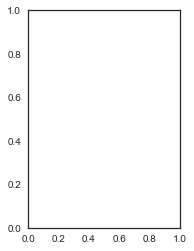

In [8]:
xtrain, xtest, ytrain, ytest=train_test_split(df[cols], df['churn'], test_size=0.1, random_state=0, stratify=df['churn'])
xgtrain = xgb.DMatrix(xtrain, ytrain, feature_names=xtrain.columns)
xgtest = xgb.DMatrix(xtest, ytest, feature_names=xtest.columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic',
    'eval_metric': ['auc','logloss',],
    'min_child_weight':1,
    'silent': 1,
    'reg_lambda' : 20,
    'reg_alpha': 5,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 5000 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, verbose_eval=250,evals_result=results)

pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))

#Learning Curves
epochs = len(results['test']['logloss'])
x_axis = range(0, epochs)

#Training ROC Curve
#plt.subplot(1, 2, 1)
fpr1,tpr1,a1=roc_curve(ytrain, pred1)
auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr1,fpr1,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve for Training data w/ AUC=%s" % str(auc1))

#Testing ROC Curve
#plt.subplot(1, 2, 2)
fpr2,tpr2,a2=roc_curve(ytest, pred2)
auc2 = auc(fpr2,tpr2)
plt.plot(fpr2,tpr2,'g')
plt.plot(fpr2,fpr2,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve with Test Data w/ AUC=%s" % str(auc2))

# plot logloss plot
#fig, ax = plt.subplots(2,2,1)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['logloss'],'b', label='Train')
ax.plot(x_axis, results['test']['logloss'],'g', label='Test')
ax.legend()
plt.ylabel('Log Loss Error')
plt.title('XGBoost LogLoss')


# plot Auc plot
#fig, ax = plt.subplots(2,2,2)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['auc'],'b', label='Train')
ax.plot(x_axis, results['test']['auc'],'g', label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.tight_layout()
plt.show()

In [9]:
model.save_model('churn_xgb_train_all')

[0]	train-auc:0.947092	train-logloss:0.306042	test-auc:0.93774	test-logloss:0.314517
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
[50]	train-auc:0.948275	train-logloss:0.307233	test-auc:0.938866	test-logloss:0.315744
[99]	train-auc:0.948551	train-logloss:0.306815	test-auc:0.939097	test-logloss:0.315378
Training accuracy score: 0.920889727315691
Classfication Report Train
             precision    recall  f1-score   support

          0       0.97      0.94      0.96   5079545
          1       0.55      0.70      0.61    504458

avg / total       0.93      0.92      0.93   5584003

Confusion Matrix Train
[[4790638  288907]
 [ 152845  351613]]
Testing accuracy score: 0.9168516145669641

Classification report Test
             precision    recall  f1-score   support

          0       0.97      0.94      0.95    564394
          1       0.53      0.67      0.59     56051

avg / total  

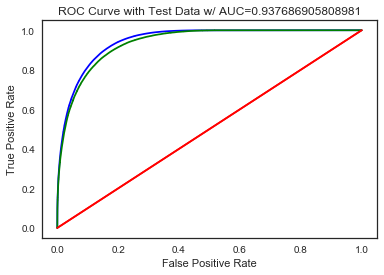

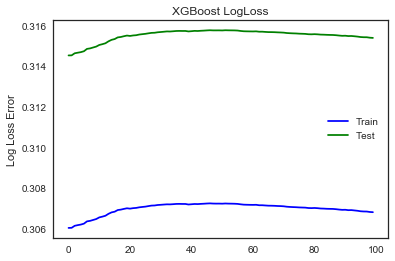

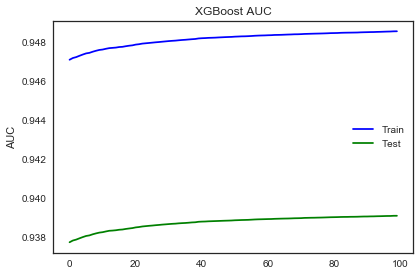

In [12]:
xtrain, xtest, ytrain, ytest=train_test_split(df[cols], df['churn'], test_size=0.1, random_state=0, stratify=df['churn'])
xgtrain = xgb.DMatrix(xtrain, ytrain, feature_names=xtrain.columns)
xgtest = xgb.DMatrix(xtest, ytest, feature_names=xtest.columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic',
    'eval_metric': ['auc','logloss',],
    'min_child_weight':1,
    'silent': 1,
    'reg_lambda' : 20,
    'reg_alpha': 5,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 100 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, xgb_model='churn_xgb_train_all',verbose_eval=50,evals_result=results)

pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))

#Learning Curves
epochs = len(results['test']['logloss'])
x_axis = range(0, epochs)

#Training ROC Curve
#plt.subplot(1, 2, 1)
fpr1,tpr1,a1=roc_curve(ytrain, pred1)
auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr1,fpr1,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve for Training data w/ AUC=%s" % str(auc1))

#Testing ROC Curve
#plt.subplot(1, 2, 2)
fpr2,tpr2,a2=roc_curve(ytest, pred2)
auc2 = auc(fpr2,tpr2)
plt.plot(fpr2,tpr2,'g')
plt.plot(fpr2,fpr2,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve with Test Data w/ AUC=%s" % str(auc2))

# plot logloss plot
#fig, ax = plt.subplots(2,2,1)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['logloss'],'b', label='Train')
ax.plot(x_axis, results['test']['logloss'],'g', label='Test')
ax.legend()
plt.ylabel('Log Loss Error')
plt.title('XGBoost LogLoss')


# plot Auc plot
#fig, ax = plt.subplots(2,2,2)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['auc'],'b', label='Train')
ax.plot(x_axis, results['test']['auc'],'g', label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.tight_layout()
plt.show()

In [19]:
pickle.dump(model, open('churn_model_all_data_final', 'wb'))

[0]	train-logloss:0.672248	test-logloss:0.6723
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
[250]	train-logloss:0.37847	test-logloss:0.37984
[500]	train-logloss:0.362361	test-logloss:0.364108
[750]	train-logloss:0.350071	test-logloss:0.352107
[1000]	train-logloss:0.341486	test-logloss:0.343905
[1250]	train-logloss:0.336294	test-logloss:0.33909
[1500]	train-logloss:0.329641	test-logloss:0.332748
[1750]	train-logloss:0.326677	test-logloss:0.330196
[2000]	train-logloss:0.32392	test-logloss:0.327832
[2250]	train-logloss:0.321539	test-logloss:0.325856
[2500]	train-logloss:0.319648	test-logloss:0.324353
[2750]	train-logloss:0.317662	test-logloss:0.322756
[3000]	train-logloss:0.315949	test-logloss:0.32144
[3250]	train-logloss:0.31436	test-logloss:0.320251
[3500]	train-logloss:0.312865	test-logloss:0.31916
[3750]	train-logloss:0.311479	test-logloss:0.318171
[4000]	train-logloss:0.31013	test-

KeyError: 'auc'

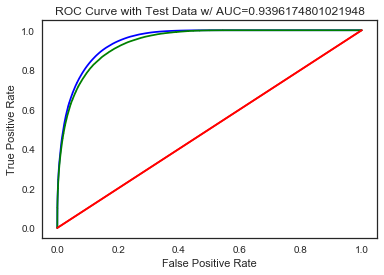

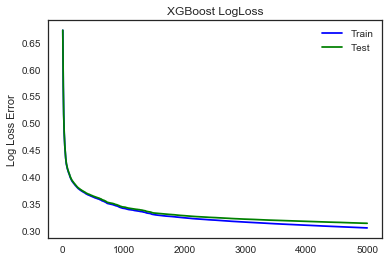

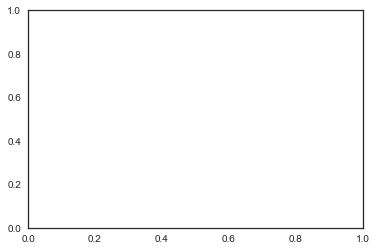

In [13]:
xtrain, xtest, ytrain, ytest=train_test_split(df[cols], df['churn'], test_size=0.1, random_state=0, stratify=df['churn'])
xgtrain = xgb.DMatrix(xtrain, ytrain, feature_names=xtrain.columns)
xgtest = xgb.DMatrix(xtest, ytest, feature_names=xtest.columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'min_child_weight':1,
    'silent': 1,
    'reg_lambda' : 20,
    'reg_alpha': 5,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 5000 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, verbose_eval=250,evals_result=results)

pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))

#Learning Curves
epochs = len(results['test']['logloss'])
x_axis = range(0, epochs)

#Training ROC Curve
#plt.subplot(1, 2, 1)
fpr1,tpr1,a1=roc_curve(ytrain, pred1)
auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr1,fpr1,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve for Training data w/ AUC=%s" % str(auc1))

#Testing ROC Curve
#plt.subplot(1, 2, 2)
fpr2,tpr2,a2=roc_curve(ytest, pred2)
auc2 = auc(fpr2,tpr2)
plt.plot(fpr2,tpr2,'g')
plt.plot(fpr2,fpr2,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve with Test Data w/ AUC=%s" % str(auc2))

# plot logloss plot
#fig, ax = plt.subplots(2,2,1)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['logloss'],'b', label='Train')
ax.plot(x_axis, results['test']['logloss'],'g', label='Test')
ax.legend()
plt.ylabel('Log Loss Error')
plt.title('XGBoost LogLoss')


# plot Auc plot
#fig, ax = plt.subplots(2,2,2)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['auc'],'b', label='Train')
ax.plot(x_axis, results['test']['auc'],'g', label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.tight_layout()
plt.show()

In [14]:
pickle.dump(model, open('churn_model_all_data_final_2', 'wb'))

In [17]:
model.save_model('churn_model_all_data_final_2_xgsave')

[0]	train-logloss:0.306085	test-logloss:0.305887
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
Stopping. Best iteration:
[0]	train-logloss:0.306085	test-logloss:0.305887

Training accuracy score: 0.9209476347410467
Classfication Report Train
             precision    recall  f1-score   support

          0       0.97      0.94      0.96   4515151
          1       0.55      0.71      0.62    448407

avg / total       0.93      0.92      0.93   4963558

Confusion Matrix Train
[[4253021  262130]
 [ 130251  318156]]
Testing accuracy score: 0.9209615679069055

Classification report Test
             precision    recall  f1-score   support

          0       0.97      0.94      0.96   1128788
          1       0.55      0.71      0.62    112102

avg / total       0.93      0.92      0.93   1240890

Confusion Matrix Test
[[1063413   65375]
 [  32703   79399]]


[('months_active', 36684), ('

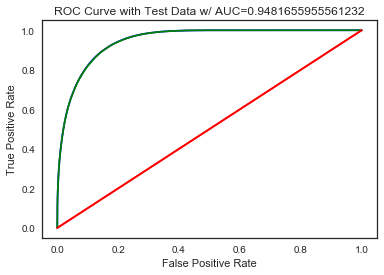

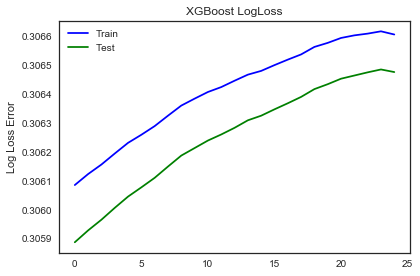

In [9]:
xtrain, xtest, ytrain, ytest=train_test_split(df[cols], df['churn'], test_size=0.2, random_state=100, stratify=df['churn'])
xgtrain = xgb.DMatrix(xtrain, ytrain, feature_names=xtrain.columns)
xgtest = xgb.DMatrix(xtest, ytest, feature_names=xtest.columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'min_child_weight':1,
    'silent': 1,
    'reg_lambda' : 20,
    'reg_alpha': 5,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 1000 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, xgb_model='churn_model_all_data_final_2_xgsave',verbose_eval=100,evals_result=results)

pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))

#Learning Curves
epochs = len(results['test']['logloss'])
x_axis = range(0, epochs)

#Training ROC Curve
#plt.subplot(1, 2, 1)
fpr1,tpr1,a1=roc_curve(ytrain, pred1)
auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,'b')
plt.plot(fpr1,fpr1,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve for Training data w/ AUC=%s" % str(auc1))

#Testing ROC Curve
#plt.subplot(1, 2, 2)
fpr2,tpr2,a2=roc_curve(ytest, pred2)
auc2 = auc(fpr2,tpr2)
plt.plot(fpr2,tpr2,'g')
plt.plot(fpr2,fpr2,'r-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve with Test Data w/ AUC=%s" % str(auc2))

# plot logloss plot
#fig, ax = plt.subplots(2,2,1)
fig, ax = plt.subplots()
ax.plot(x_axis, results['train']['logloss'],'b', label='Train')
ax.plot(x_axis, results['test']['logloss'],'g', label='Test')
ax.legend()
plt.ylabel('Log Loss Error')
plt.title('XGBoost LogLoss')
plt.tight_layout()
plt.show()

In [15]:
pd.crosstab(df[df['churn']==0]['Year'],df[df['churn']==0]['Month'])

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2015,0,0,164385,165263,165297,165948,165579,165994,166534,166923,165695,167281
2016,169075,171386,171962,172599,173323,175042,176588,177766,179154,180866,181587,181955
2017,183273,183419,184293,185724,186665,188718,188587,190476,190971,191611,0,0


In [37]:
df_test=df[(df['Year']>=2017)&(df['Month']>=8)]

In [38]:
df_test.shape

(622541, 86)

In [21]:
pd.crosstab(df_test[df_test['churn']==1]['Year'],df_test[df_test['churn']==1]['Month'])

Month,8,9,10
Year,,,
2017,19684,18029,11770


In [23]:
df_train=df[~((df['Year']>=2017)&(df['Month']>=8))]

In [24]:
df_train['Month']

(5581907, 86)

In [26]:
xtrain=df_train.loc[:, df_train.columns != 'churn']
ytrain=df_train['churn']

In [65]:
xtest=df_test.loc[:, df_test.columns != 'churn']
ytest=df_test['churn']

In [66]:
print (xtrain.shape)
print (ytrain.shape)
print (xtest.shape)
print (ytest.shape)

(5581907, 85)
(5581907,)
(622541, 87)
(622541,)


In [59]:
df_test['churn'].value_counts()

0    573058
1     49483
Name: churn, dtype: int64

In [60]:
df_train['churn'].value_counts()

0    5070881
1     511026
Name: churn, dtype: int64

In [67]:
y=pd.DataFrame(ytest)

In [68]:
y['churn'].value_counts()

0    573058
1     49483
Name: churn, dtype: int64

In [70]:
xgtrain = xgb.DMatrix(xtrain[cols], ytrain, feature_names=xtrain[cols].columns)
xgtest = xgb.DMatrix(xtest[cols], ytest, feature_names=xtest[cols].columns)

In [ ]:
cols=['renewal_3months','BT_Yes','revolve_Yes','MR_Count',
      'MR_Unique_Level3', 'detailed_fee_type', 'product_description',
      'AgeCat','months_active','acct_myca_active', 'optout','SuppStatus_1',
      'acct_spend_lcl', 'acct_spend_lcl-1', 'acct_spend_lcl-2', 'acct_spend_lcl-3',
       'acct_spend_lcl-4', 'acct_spend_lcl-5', 'acct_supp_spend_lcl',
       'acct_supp_spend_lcl-1', 'acct_supp_spend_lcl-2',
       'acct_supp_spend_lcl-3', 'acct_supp_spend_lcl-4',
       'acct_supp_spend_lcl-5', 'roc_cnt', 'roc_cnt-1', 'roc_cnt-2',
       'roc_cnt-3', 'roc_cnt-4', 'roc_cnt-5', 'roc_supp_cnt', 'roc_supp_cnt-1',
       'roc_supp_cnt-2', 'roc_supp_cnt-3', 'roc_supp_cnt-4', 'roc_supp_cnt-5',
       'myca_active_app', 'myca_active_app-1','myca_active_app-2', 'myca_active_app-3', 'myca_active_app-4',
       'myca_active_app-5','Avg_E_O/S', 'Avg_E_C/O']

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
xgtrain = xgb.DMatrix(xtrain[cols], ytrain, feature_names=xtrain[cols].columns)
xgtest = xgb.DMatrix(xtest[cols], ytest, feature_names=xtest[cols].columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.9,
    'colsample_bytree': 0.9,
    'objective': 'binary:logistic',
    'eval_metric': ['auc','logloss'],
    'min_child_weight':1,
    'silent': 1,
    'reg_lambda' : 20,
    'reg_alpha': 5,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 5000 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, verbose_eval=250,evals_result=results)

pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.5
pred_1=pred_1.astype(int)
pred_2=pred2>0.5
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))


[0]	train-auc:0.8731	train-logloss:0.672068	test-auc:0.854384	test-logloss:0.672146
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
[250]	train-auc:0.920299	train-logloss:0.370819	test-auc:0.87785	test-logloss:0.456337
Stopping. Best iteration:
[338]	train-auc:0.924272	train-logloss:0.362511	test-auc:0.878917	test-logloss:0.451423

Training accuracy score: 0.8014316612584194
Classfication Report Train
             precision    recall  f1-score   support

          0       0.99      0.79      0.88   5070881
          1       0.30      0.88      0.45    511026

avg / total       0.92      0.80      0.84   5581907

Confusion Matrix Train
[[4022594 1048287]
 [  60103  450923]]
Testing accuracy score: 0.7766026655272504

Classification report Test
             precision    recall  f1-score   support

          0       0.98      0.77      0.86    573058
          1       0.24      0.82      0

In [84]:
pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))


Training accuracy score: 0.9139423139797922
Classfication Report Train
             precision    recall  f1-score   support

          0       0.96      0.94      0.95   5070881
          1       0.53      0.62      0.57    511026

avg / total       0.92      0.91      0.92   5581907

Confusion Matrix Train
[[4787054  283827]
 [ 196539  314487]]
Testing accuracy score: 0.8807468102502486

Classification report Test
             precision    recall  f1-score   support

          0       0.96      0.91      0.93    573058
          1       0.34      0.55      0.42     49483

avg / total       0.91      0.88      0.89    622541

Confusion Matrix Test
[[520975  52083]
 [ 22157  27326]]


[('months_active', 3863), ('product_description', 2425), ('detailed_fee_type', 822), ('acct_spend_lcl', 691), ('roc_cnt', 664), ('renewal_3months', 609), ('roc_cnt-5', 440), ('Avg_E_O/S', 425), ('acct_spend_lcl-4', 424), ('revolve_Yes', 419), ('acct_spend_lcl-5', 387), ('acct_myca_active', 382), ('MR_Count

In [76]:
df_test['churn_prob']=pred2
df_test['churn_1']=pred_2

In [77]:
df_test.head()

,LAV_ID1,Month,Year,churn,renewal_3months,BT_Yes,revolve_Yes,FF_Yes,FH_Yes,LC_Yes,MR_Count,MR_Unique_Level3,detailed_fee_type,product_description,AgeCat,acct_myca_active,optout,SuppStatus_1,cancel_dt,estab_dt,estab_dt_1,months_active,Avg_lcl_spend,Avg_lcl_supp_spend,Avg_roc_count,Avg_roc_supp_count,acct_purchase_size,Supp_purchase_size,Avg_Supp_Count,Avg_myca_count,Avg_E_O/S,Avg_E_C/O,acct_spend_lcl,acct_spend_lcl-1,acct_spend_lcl-2,acct_spend_lcl-3,acct_spend_lcl-4,acct_spend_lcl-5,acct_supp_spend_lcl,acct_supp_spend_lcl-1,acct_supp_spend_lcl-2,acct_supp_spend_lcl-3,acct_supp_spend_lcl-4,acct_supp_spend_lcl-5,roc_cnt,roc_cnt-1,roc_cnt-2,roc_cnt-3,roc_cnt-4,roc_cnt-5,roc_supp_cnt,roc_supp_cnt-1,roc_supp_cnt-2,roc_supp_cnt-3,roc_supp_cnt-4,roc_supp_cnt-5,atvesupp,atvesupp-1,atvesupp-2,atvesupp-3,atvesupp-4,atvesupp-5,myca_active_app,myca_active_app-1,myca_active_app-2,myca_active_app-3,myca_active_app-4,myca_active_app-5,total_sent,total_sent-1,total_sent-2,total_sent-3,total_sent-4,total_sent-5,total_opens,total_opens-1,total_opens-2,total_opens-3,total_opens-4,total_opens-5,total_clicks,total_clicks-1,total_clicks-2,total_clicks-3,total_clicks-4,total_clicks-5,churn_prob,churn_1
14,LAV000000000084542,8,2017,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0,3,19,3,1.0,0.0,1,2100-01-01,1979-09-01,1979-09-01,458,5556.333333,5933.833333,20.666667,14.833333,268.854839,400.033708,3.0,0.333333,0.555556,0.0,4349,1142.0,5157.0,16865.0,2180.0,3645.0,1301.0,1240.0,10560.0,16802.0,2117.0,3583.0,21.0,19.0,22.0,19.0,21.0,22.0,12.0,14.0,16.0,14.0,16.0,17.0,3,3.0,3.0,3.0,3.0,3.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,1.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000048,0
16,LAV000000000130888,9,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,1,0.0,1.0,0,2100-01-01,1988-03-01,1988-03-01,356,25.666667,0.000000,0.166667,0.000000,154.000000,NaN,0.0,0.000000,1.000000,0.0,154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.421915,0
21,LAV000000000084016,8,2017,0,1,0.0,0.0,0.0,0.0,0.0,2.0,1,3,19,1,1.0,0.0,1,2100-01-01,2015-10-01,2015-10-01,25,4730.000000,900.166667,59.000000,24.500000,80.169492,36.741497,1.0,0.000000,1.000000,0.0,4257,12386.0,1941.0,2397.0,4900.0,2499.0,1373.0,831.0,166.0,807.0,1123.0,1101.0,87.0,87.0,41.0,30.0,70.0,39.0,31.0,27.0,8.0,13.0,43.0,25.0,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,4.0,1.0,4.0,3.0,2.0,3.0,4.0,1.0,4.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000109,0
29,LAV000000000002600,10,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,4,0.0,0.0,1,2100-01-01,2017-03-01,2017-03-01,8,3685.833333,26.500000,10.666667,0.166667,345.546875,159.000000,1.0,0.000000,0.545455,0.0,186,16055.0,213.0,583.0,4308.0,770.0,0.0,0.0,0.0,0.0,0.0,159.0,7.0,13.0,8.0,10.0,15.0,11.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0,2.0,3.0,0.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000175,0
33,LAV000000000160555,9,2017,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,14,0,0.0,1.0,0,2100-01-01,2000-06-01,2000-06-01,209,1710.333333,0.000000,4.833333,0.000000,353.862069,NaN,0.0,0.000000,0.250000,0.0,272,355.0,8264.0,389.0,207.0,775.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,7.0,4.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.227679,0


In [78]:
df_test.shape

(622541, 88)

In [79]:
pd.crosstab(df_test[(df['Year']==2017)&(df_test['Month']==10)]['churn'],df_test[(df['Year']==2017)&(df_test['Month']==10)]['churn_1'])

churn_1,0,1
churn,,
0,146649,44962
1,2146,9624


In [34]:
pickle.dump(model, open('churn_model_all_data_final_3', 'wb'))

In [80]:
9624/11770

0.8176720475785897

### Using subset of columns

In [74]:
cols1=['renewal_3months', 'BT_Yes',
       'revolve_Yes', 'MR_Count',
       'MR_Unique_Level3', 'detailed_fee_type', 'product_description',
       'AgeCat', 'acct_myca_active', 'optout', 'SuppStatus_1', 'months_active', 'Avg_lcl_spend',
       'Avg_lcl_supp_spend', 'Avg_roc_count', 'Avg_roc_supp_count',
       'Avg_Supp_Count',
       'Avg_myca_count', 'Avg_E_O/S', 'Avg_E_C/O']

[0]	train-auc:0.848378	train-logloss:0.674439	test-auc:0.846899	test-logloss:0.674511
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
[200]	train-auc:0.899777	train-logloss:0.410114	test-auc:0.898571	test-logloss:0.411675
[400]	train-auc:0.907531	train-logloss:0.39544	test-auc:0.906064	test-logloss:0.397195
[600]	train-auc:0.913338	train-logloss:0.384688	test-auc:0.911765	test-logloss:0.386486
[800]	train-auc:0.919212	train-logloss:0.373679	test-auc:0.917581	test-logloss:0.3755
[1000]	train-auc:0.92361	train-logloss:0.365091	test-auc:0.921844	test-logloss:0.366981
[1200]	train-auc:0.926669	train-logloss:0.358744	test-auc:0.924767	test-logloss:0.360776
[1400]	train-auc:0.928609	train-logloss:0.354462	test-auc:0.926661	test-logloss:0.35654
[1600]	train-auc:0.929841	train-logloss:0.351694	test-auc:0.9278	test-logloss:0.353851
[1800]	train-auc:0.930744	train-logloss:0.349643	test-auc:0.9285

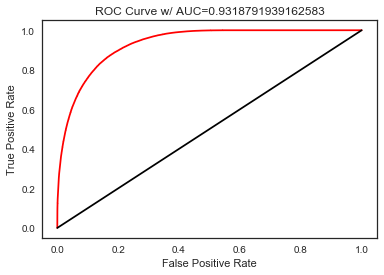

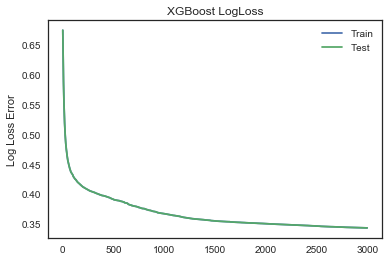

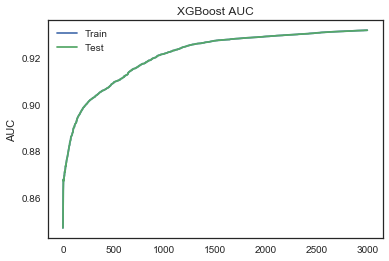

In [11]:
xtrain, xtest, ytrain, ytest=train_test_split(df[cols1], df['churn'], test_size=0.1, random_state=0, stratify=df['churn'])
xgtrain = xgb.DMatrix(xtrain, ytrain, feature_names=xtrain.columns)
xgtest = xgb.DMatrix(xtest, ytest, feature_names=xtest.columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': ['auc','logloss',],
    'min_child_weight':5,
    'silent': 1,
    #'reg_lambda' : 41,
    #'reg_alpha': 0.01,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 3000 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, verbose_eval=200,evals_result=results)
    
pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))

#fig, ax = plt.subplots(figsize=(12,18))
#xgb.plot_importance(model, height=0.8, ax=ax)
#plt.show()

#Learning Curves
epochs = len(results['test']['logloss'])
x_axis = range(0, epochs)

fpr1,tpr1,a1=roc_curve(ytest, pred2)
auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,'r')
plt.plot(fpr1,fpr1,'k-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve w/ AUC=%s" % str(auc1))

# plot logloss plot
fig, ax = plt.subplots()
ax.plot(x_axis, results['test']['logloss'], label='Train')
ax.plot(x_axis, results['test']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss Error')
plt.title('XGBoost LogLoss')
plt.show()

# plot Auc plot
fig, ax = plt.subplots()
ax.plot(x_axis, results['test']['auc'], label='Train')
ax.plot(x_axis, results['test']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

[0]	train-auc:0.848378	train-logloss:0.67444	test-auc:0.846899	test-logloss:0.674512
Multiple eval metrics have been passed: 'test-logloss' will be used for early stopping.

Will train until test-logloss hasn't improved in 25 rounds.
[200]	train-auc:0.899461	train-logloss:0.41049	test-auc:0.898206	test-logloss:0.412109
[400]	train-auc:0.906845	train-logloss:0.396475	test-auc:0.905402	test-logloss:0.39823
[600]	train-auc:0.91298	train-logloss:0.385466	test-auc:0.911414	test-logloss:0.387284
[800]	train-auc:0.917411	train-logloss:0.377152	test-auc:0.915759	test-logloss:0.379023
[1000]	train-auc:0.920675	train-logloss:0.370893	test-auc:0.918948	test-logloss:0.372784
[1200]	train-auc:0.924253	train-logloss:0.363653	test-auc:0.922479	test-logloss:0.365521
[1400]	train-auc:0.926856	train-logloss:0.358189	test-auc:0.925027	test-logloss:0.360051
[1600]	train-auc:0.928777	train-logloss:0.354047	test-auc:0.926871	test-logloss:0.355911
[1800]	train-auc:0.929611	train-logloss:0.352186	test-auc:0.9

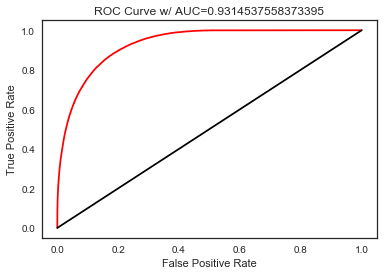

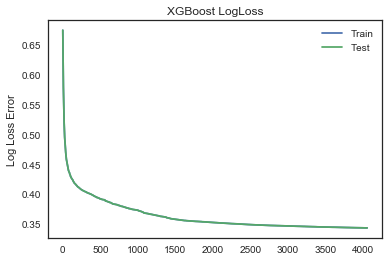

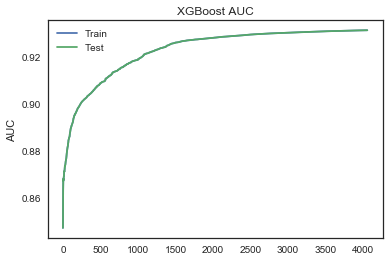

In [27]:
xtrain, xtest, ytrain, ytest=train_test_split(df[cols1], df['churn'], test_size=0.1, random_state=0, stratify=df['churn'])
xgtrain = xgb.DMatrix(xtrain, ytrain, feature_names=xtrain.columns)
xgtest = xgb.DMatrix(xtest, ytest, feature_names=xtest.columns)
xgtrain_label = xgtrain.get_label()
ratio=float(np.sum(xgtrain_label==0)/np.sum(xgtrain_label==1))

xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'binary:logistic',
    'eval_metric': ['auc','logloss',],
    'min_child_weight':5,
    'silent': 1,
    'reg_lambda' : 41,
    'reg_alpha': 0.01,
    'scale_pos_weight': ratio,
    'seed':0
}
results={}
num_rounds = 5000 
watchlist = [ (xgtrain,'train'), (xgtest, 'test') ]
model = xgb.train(xgb_params, xgtrain, num_rounds, watchlist, early_stopping_rounds=25, verbose_eval=200,evals_result=results)

pred1 = np.array(model.predict(xgtrain,ntree_limit=model.best_iteration))
pred2 = np.array(model.predict(xgtest,ntree_limit=model.best_iteration))
pred_1=pred1>0.75
pred_1=pred_1.astype(int)
pred_2=pred2>0.75
pred_2=pred_2.astype(int)

print ("Training accuracy score: {}".format(accuracy_score(ytrain, pred_1)))
print ("Classfication Report Train")
print (classification_report(ytrain, pred_1))
print ("Confusion Matrix Train")
print (confusion_matrix(ytrain, pred_1))
print ("Testing accuracy score: {}".format(accuracy_score(ytest, pred_2)))
print ("\nClassification report Test")
print (classification_report(ytest, pred_2))
print ("Confusion Matrix Test")
print (confusion_matrix(ytest, pred_2))
print ("\n")

print (sorted(model.get_score().items(),key = itemgetter(1),reverse = True))

#fig, ax = plt.subplots(figsize=(12,18))
#xgb.plot_importance(model, height=0.8, ax=ax)
#plt.show()

#Learning Curves
epochs = len(results['test']['logloss'])
x_axis = range(0, epochs)

fpr1,tpr1,a1=roc_curve(ytest, pred2)
auc1 = auc(fpr1,tpr1)
plt.plot(fpr1,tpr1,'r')
plt.plot(fpr1,fpr1,'k-')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC Curve w/ AUC=%s" % str(auc1))

# plot logloss plot
fig, ax = plt.subplots()
ax.plot(x_axis, results['test']['logloss'], label='Train')
ax.plot(x_axis, results['test']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss Error')
plt.title('XGBoost LogLoss')
plt.show()

# plot Auc plot
fig, ax = plt.subplots()
ax.plot(x_axis, results['test']['auc'], label='Train')
ax.plot(x_axis, results['test']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

In [28]:
model.save_model('churn_xgb_train1')

In [ ]:
print('formating for lgb')
d_train = lgb.Dataset(df_train[f_to_use],
                      label=labels,
                      categorical_feature=['aisle_id', 'department_id'])  # , 'order_hour_of_day', 'dow'
del df_train

In [ ]:
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss'},
    'num_leaves': 96,
    'max_depth': 10,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.95,
    'bagging_freq': 5
}
ROUNDS = 100

In [ ]:
print('light GBM train :-)')
bst = lgb.train(params, d_train, ROUNDS)
lgb.plot_importance(bst, figsize=(9,20))
del d_train

In [ ]:
### build candidates list for test ###

df_test, _ = features(test_orders)

print('light GBM predict')
preds = bst.predict(df_test[f_to_use])
df_test['pred'] = preds